In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

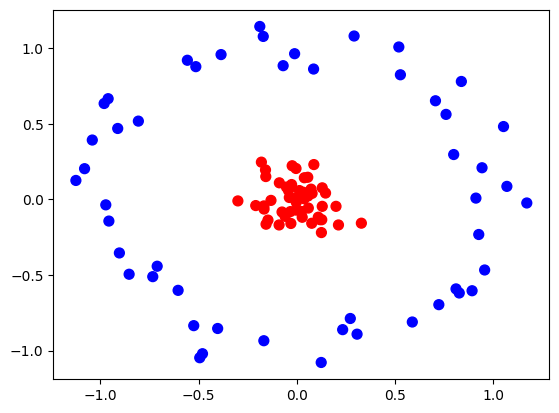

In [2]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [4]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.25

In [6]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_2532\2718072598.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


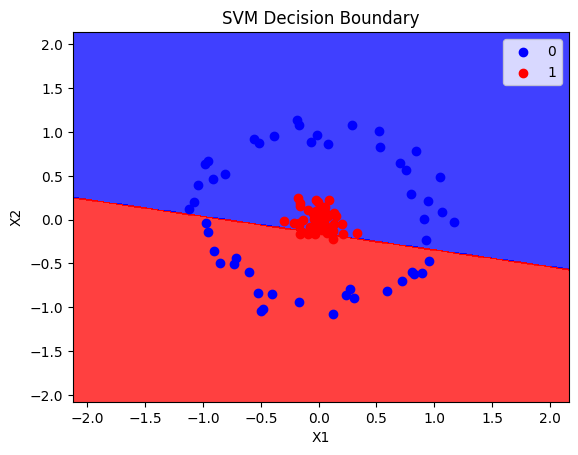

In [7]:
plot_decision_boundary(X, y, classifier)

In [8]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

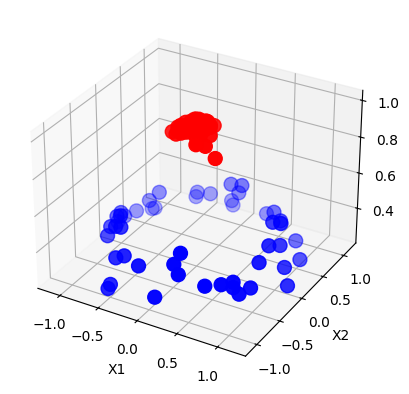

In [9]:
plot_3d_plot(X,y)

In [10]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [11]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\HP\AppData\Local\Temp\ipykernel_2532\2718072598.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


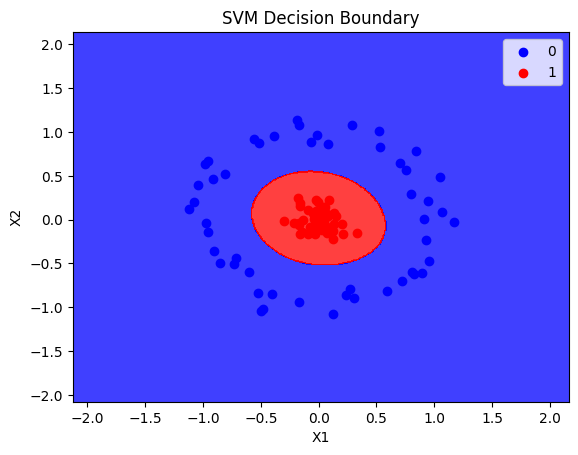

In [12]:
plot_decision_boundary(X, y, rbf_classifier)

In [13]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\HP\AppData\Local\Temp\ipykernel_2532\2718072598.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


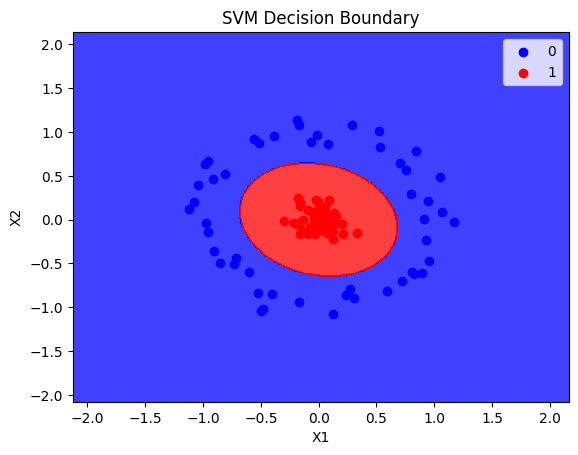

In [15]:
plot_decision_boundary(X, y, poly_classifier)

In [16]:
X

array([[-0.02667706,  0.0976707 ],
       [-0.07541006, -0.08392923],
       [ 0.11775549, -0.13447426],
       [-0.05298453,  0.08092636],
       [-0.20937539, -0.04136162],
       [-0.1677491 , -0.04362944],
       [-0.55753209,  0.9196274 ],
       [-0.15961723,  0.19430883],
       [ 0.109186  , -0.11818878],
       [ 0.03610957,  0.03761395],
       [-0.1710906 ,  1.07721044],
       [ 0.94319858,  0.20868089],
       [ 0.04349129,  0.02593503],
       [ 0.23338221, -0.86191524],
       [-0.06974515,  0.88374007],
       [-0.02378053,  0.22193016],
       [-0.90378936, -0.35474154],
       [-0.912312  ,  0.46853363],
       [-0.51449841,  0.87732497],
       [-1.12532871,  0.12477761],
       [-1.04181799,  0.3920408 ],
       [ 0.08531995,  0.86153929],
       [ 0.08664127,  0.22980385],
       [ 0.03820758,  0.14262365],
       [ 0.12687445, -0.13475327],
       [ 0.82721375, -0.61950697],
       [ 0.29164748,  1.07995913],
       [-0.03295166, -0.08127951],
       [ 0.14618473,

In [17]:
np.exp(-(X**2)).sum(1)

array([1.98979438, 1.9873101 , 1.96830854, 1.9906689 , 1.95539962,
       1.97035076, 1.16208015, 1.9377921 , 1.97427772, 1.99728314,
       1.28451863, 1.36819724, 1.9974379 , 1.42272281, 1.45309686,
       1.95137491, 1.32358228, 1.23794287, 1.23058195, 1.26640551,
       1.1953045 , 1.46878858, 1.9410818 , 1.97840523, 1.96603717,
       1.18572724, 1.22997255, 1.99233019, 1.97714119, 1.99838627,
       1.99624186, 1.20816048, 1.99959579, 1.26164565, 1.44426078,
       1.14464992, 1.95884642, 1.20429217, 1.11672695, 1.43514627,
       1.9802721 , 1.95924053, 1.26456656, 1.91364456, 1.14632793,
       1.25657032, 1.9635208 , 1.97586119, 1.04033831, 1.95289772,
       1.26132273, 1.94898219, 1.33193839, 1.90928879, 1.36167027,
       1.99489731, 1.87301672, 1.93723801, 1.99475626, 1.99988792,
       1.27047456, 1.25306087, 1.39551171, 1.22225261, 1.37110775,
       1.38662991, 1.96950484, 1.05092295, 1.22532408, 1.98386248,
       1.311125  , 1.96835652, 1.37945316, 1.4250832 , 1.92771

In [18]:
X_new=np.exp(-(X**2))

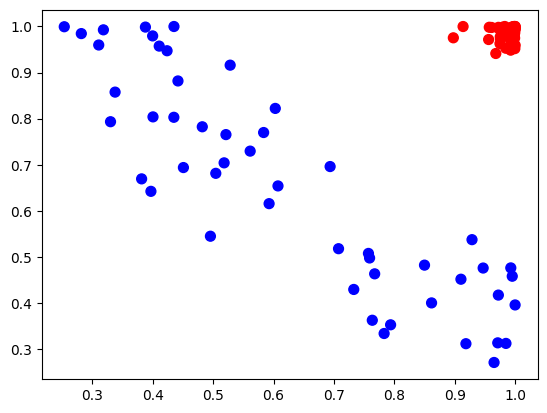

In [19]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')